# 1. Import Packages and Read Files

In [1]:
#Import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

## 1.1 MSS

In [2]:
#Read file as stations
stations = pd.read_csv('../assets/mss/stations.csv')

In [3]:
# Convert all columns to lowercase and replace spaces in column names.
stations.columns = stations.columns.str.lower().str.replace(' ', '_')

In [4]:
# Check for missing values.
stations.isnull().sum()

unnamed:_0      0
station_code    0
station_name    0
longitude       0
latitude        0
dtype: int64

In [5]:
#drop unnamed column
stations.drop(['unnamed:_0'], axis=1, inplace=True)

In [6]:
#Check data again
stations.head()

,station_code,station_name,longitude,latitude
0,S06,Paya Lebar,103.903733,1.357133
1,S07,Macritchie Reservoir,103.833900,1.341800
2,S08,Lower Peirce Reservoir,103.827067,1.370033
3,S101,Jurong (North),103.713400,1.350533
4,S102,Semakau Island,103.765717,1.190167


In [7]:
#Check shape in mss
stations.shape

(63, 4)

In [8]:
#Read file as mss
mss = pd.read_csv('../assets/mss/mss_data.csv')

In [9]:
# Convert all columns to lowercase and replace spaces in column names.
mss.columns = mss.columns.str.lower().str.replace(' ', '_')

In [10]:
#Check data in mss
mss.head()

,unnamed:_0,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,0,Paya Lebar,2009.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN
1,1,Paya Lebar,2009.0,1.0,2.0,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN
2,2,Paya Lebar,2009.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN
3,3,Paya Lebar,2009.0,1.0,4.0,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN
4,4,Paya Lebar,2009.0,1.0,5.0,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN


In [11]:
#drop unnamed column
mss.drop(['unnamed:_0'], axis=1, inplace=True)

In [12]:
#Check data types
mss.dtypes

station                      object
year                        float64
month                       float64
day                         float64
daily_rainfall_total        float64
highest_30_min_rainfall     float64
highest_60_min_rainfall     float64
highest_120_min_rainfall    float64
mean_temperature            float64
maximum_temperature         float64
minimum_temperature         float64
mean_wind_speed             float64
max_wind_speed              float64
dtype: object

In [13]:
# Check for missing values.
mss.isnull().sum()

station                          0
year                           394
month                          394
day                            394
daily_rainfall_total          8929
highest_30_min_rainfall     118965
highest_60_min_rainfall     119064
highest_120_min_rainfall    119061
mean_temperature            197072
maximum_temperature         189395
minimum_temperature         189437
mean_wind_speed             189406
max_wind_speed              190440
dtype: int64

In [14]:
#Return data with missing year
mss[mss['year'].isna()]

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
18440,Jurong (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18441,Jurong (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18442,Jurong (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18443,Jurong (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18444,Jurong (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255562,Boon Lay (East),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255563,Boon Lay (East),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255564,Boon Lay (East),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255565,Boon Lay (East),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Check shape
mss.shape

(283907, 13)

In [16]:
#drop all rows with missing year
mss.drop(mss[mss['year'].isnull()].index, inplace = True)

In [17]:
#Check shape
mss.shape

(283513, 13)

In [18]:
#Check nulls
mss.isnull().sum()

station                          0
year                             0
month                            0
day                              0
daily_rainfall_total          8535
highest_30_min_rainfall     118571
highest_60_min_rainfall     118670
highest_120_min_rainfall    118667
mean_temperature            196678
maximum_temperature         189001
minimum_temperature         189043
mean_wind_speed             189012
max_wind_speed              190046
dtype: int64

In [19]:
#Check rows with missing minimum temperature
mss.loc[mss['minimum_temperature'].isnull()]

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
4254,Paya Lebar,2020.0,8.0,25.0,0.0,0.0,0.0,0.0,28.4,32.1,NaN,7.7,42.6
4258,Paya Lebar,2020.0,8.0,29.0,2.7,NaN,NaN,NaN,27.5,31.3,NaN,5.9,38.9
4372,Paya Lebar,2020.0,12.0,21.0,2.7,4.0,4.0,4.0,28.1,32.0,NaN,8.1,40.7
4819,Paya Lebar,2022.0,3.0,13.0,1.8,1.6,1.8,1.8,NaN,NaN,NaN,NaN,25.9
5052,Macritchie Reservoir,2009.0,1.0,1.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283902,Pasir Ris (Central),2022.0,10.0,27.0,0.8,0.4,0.6,0.8,NaN,NaN,NaN,NaN,NaN
283903,Pasir Ris (Central),2022.0,10.0,28.0,4.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
283904,Pasir Ris (Central),2022.0,10.0,29.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
283905,Pasir Ris (Central),2022.0,10.0,30.0,39.2,24.8,26.2,39.2,NaN,NaN,NaN,NaN,NaN


In [20]:
#Convert Year Month and Day to integers
mss['year']= mss['year'].astype(int)
mss['month']= mss['month'].astype(int)
mss['day']= mss['day'].astype(int)

In [21]:
#Check head
mss.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,Paya Lebar,2009,1,1,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN
1,Paya Lebar,2009,1,2,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN
2,Paya Lebar,2009,1,3,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN
3,Paya Lebar,2009,1,4,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN
4,Paya Lebar,2009,1,5,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN


In [22]:
#Convert Year Month and Day to integers
mss['year']= mss['year'].astype(str)
mss['month']= mss['month'].astype(str)
mss['day']= mss['day'].astype(str)

In [23]:
#Check head
mss.dtypes

station                      object
year                         object
month                        object
day                          object
daily_rainfall_total        float64
highest_30_min_rainfall     float64
highest_60_min_rainfall     float64
highest_120_min_rainfall    float64
mean_temperature            float64
maximum_temperature         float64
minimum_temperature         float64
mean_wind_speed             float64
max_wind_speed              float64
dtype: object

In [24]:
#Add 0 in front of day and month
mss['month'] = mss['month'].apply (lambda x: '{0:0>2}'.format (x))
mss['day'] = mss['day'].apply (lambda x: '{0:0>2}'.format (x))

In [25]:
mss.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,Paya Lebar,2009,01,01,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN
1,Paya Lebar,2009,01,02,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN
2,Paya Lebar,2009,01,03,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN
3,Paya Lebar,2009,01,04,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN
4,Paya Lebar,2009,01,05,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN


In [26]:
#Create a column year_month
mss['year_month'] = mss['year']+ "-" + mss['month']
mss.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_month
0,Paya Lebar,2009,01,01,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN,2009-01
1,Paya Lebar,2009,01,02,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN,2009-01
2,Paya Lebar,2009,01,03,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN,2009-01
3,Paya Lebar,2009,01,04,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN,2009-01
4,Paya Lebar,2009,01,05,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN,2009-01


In [27]:
#New
#Create a column Date
mss['date'] = mss['year']+ "-" + mss['month']+ "-" + mss['day']
mss.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_month,date
0,Paya Lebar,2009,01,01,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN,2009-01,2009-01-01
1,Paya Lebar,2009,01,02,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN,2009-01,2009-01-02
2,Paya Lebar,2009,01,03,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN,2009-01,2009-01-03
3,Paya Lebar,2009,01,04,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN,2009-01,2009-01-04
4,Paya Lebar,2009,01,05,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN,2009-01,2009-01-05


In [28]:
#New
mss.dtypes

station                      object
year                         object
month                        object
day                          object
daily_rainfall_total        float64
highest_30_min_rainfall     float64
highest_60_min_rainfall     float64
highest_120_min_rainfall    float64
mean_temperature            float64
maximum_temperature         float64
minimum_temperature         float64
mean_wind_speed             float64
max_wind_speed              float64
year_month                   object
date                         object
dtype: object

In [29]:
mss["date"] = pd.to_datetime(mss["date"])

In [30]:
#New
mss.dtypes

station                             object
year                                object
month                               object
day                                 object
daily_rainfall_total               float64
highest_30_min_rainfall            float64
highest_60_min_rainfall            float64
highest_120_min_rainfall           float64
mean_temperature                   float64
maximum_temperature                float64
minimum_temperature                float64
mean_wind_speed                    float64
max_wind_speed                     float64
year_month                          object
date                        datetime64[ns]
dtype: object

In [128]:
mss['week'] = mss['date'].dt.strftime('%U')
#'%U' represents the week number of the year (Sunday as the first day of the week) as a zero padded decimal number. 
#All days in a new year preceding the first Sunday are considered to be in week 0.

In [129]:
mss.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_month,date,week
0,Paya Lebar,2009,01,01,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN,2009-01,2009-01-01,00
1,Paya Lebar,2009,01,02,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN,2009-01,2009-01-02,00
2,Paya Lebar,2009,01,03,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN,2009-01,2009-01-03,00
3,Paya Lebar,2009,01,04,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN,2009-01,2009-01-04,01
4,Paya Lebar,2009,01,05,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN,2009-01,2009-01-05,01


In [132]:
#New
#Create a column Date
mss['year-week'] = mss['year']+ "-" + mss['week']
mss.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_month,date,week,year-week
0,Paya Lebar,2009,01,01,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN,2009-01,2009-01-01,00,2009-00
1,Paya Lebar,2009,01,02,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN,2009-01,2009-01-02,00,2009-00
2,Paya Lebar,2009,01,03,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN,2009-01,2009-01-03,00,2009-00
3,Paya Lebar,2009,01,04,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN,2009-01,2009-01-04,01,2009-01
4,Paya Lebar,2009,01,05,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN,2009-01,2009-01-05,01,2009-01


In [133]:
mssTest = mss.groupby('year-week').agg(daily_rainfall_total=('daily_rainfall_total', 'sum'), mean_temperature=('mean_temperature', 'mean'), minimum_temperature=('minimum_temperature', 'min'), maximum_temperature=('maximum_temperature', 'max')).reset_index()

In [134]:
mssTest

,year-week,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature
0,2009-00,224.1,26.137500,22.7,32.7
1,2009-01,103.8,26.815000,23.0,32.5
2,2009-02,25.9,26.431250,21.5,32.1
3,2009-03,29.3,26.921429,21.2,34.2
4,2009-04,118.4,26.750000,21.3,33.5
...,...,...,...,...,...
729,2022-40,7173.0,26.533846,22.6,33.9
730,2022-41,1852.9,27.768182,22.5,35.0
731,2022-42,4929.7,27.836090,22.1,34.8
732,2022-43,1847.9,27.305303,22.2,35.0


In [33]:
#Groupby to sum up daily_rainfall_total
#mss2 groups by year_month only
mss2 = mss.groupby('year_month').agg(daily_rainfall_total=('daily_rainfall_total', 'sum'), mean_temperature=('mean_temperature', 'mean'), minimum_temperature=('minimum_temperature', 'min'), maximum_temperature=('maximum_temperature', 'max')).reset_index()

In [34]:
mss2

,year_month,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature
0,2009-01,501.5,26.715179,21.2,34.2
1,2009-02,4867.3,27.100000,21.4,35.1
2,2009-03,10721.6,27.037811,21.8,34.7
3,2009-04,8701.2,28.065000,22.6,35.1
4,2009-05,6352.1,28.463713,21.5,34.8
...,...,...,...,...,...
161,2022-06,10645.5,27.781932,22.0,35.1
162,2022-07,5680.8,28.523939,21.6,35.8
163,2022-08,10573.9,27.884354,21.7,35.1
164,2022-09,11322.1,27.730511,21.6,34.5


In [35]:
#Round temperature to 1dp
mss2['mean_temperature'] = mss2['mean_temperature'].round(decimals = 1)

In [36]:
mss2

,year_month,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature
0,2009-01,501.5,26.7,21.2,34.2
1,2009-02,4867.3,27.1,21.4,35.1
2,2009-03,10721.6,27.0,21.8,34.7
3,2009-04,8701.2,28.1,22.6,35.1
4,2009-05,6352.1,28.5,21.5,34.8
...,...,...,...,...,...
161,2022-06,10645.5,27.8,22.0,35.1
162,2022-07,5680.8,28.5,21.6,35.8
163,2022-08,10573.9,27.9,21.7,35.1
164,2022-09,11322.1,27.7,21.6,34.5


In [37]:
#Groupby to sum up year_month and station
#mss3 groups by year_month for each station
mss3 = mss.groupby(['year_month', 'station']).agg(daily_rainfall_total=('daily_rainfall_total', 'sum'), mean_temperature=('mean_temperature', 'mean'), minimum_temperature=('minimum_temperature', 'min'), maximum_temperature=('maximum_temperature', 'max')).reset_index()

In [38]:
mss3

,year_month,station,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature
0,2009-01,Admiralty,0.8,26.342857,23.3,31.9
1,2009-01,Admiralty West,1.0,NaN,NaN,NaN
2,2009-01,Boon Lay (West),21.7,NaN,NaN,NaN
3,2009-01,Buangkok,6.3,NaN,NaN,NaN
4,2009-01,Bukit Panjang,14.2,NaN,NaN,NaN
...,...,...,...,...,...,...
9311,2022-10,Tuas South,410.0,27.580000,22.8,32.8
9312,2022-10,Tuas West,452.0,NaN,NaN,NaN
9313,2022-10,Ulu Pandan,525.6,NaN,NaN,NaN
9314,2022-10,Upper Peirce Reservoir,392.0,NaN,NaN,NaN


In [39]:
#Check column header for station
for col in stations.columns:
    print(col)

station_code
station_name
longitude
latitude


In [40]:
#Check column header for mss
for col in mss3.columns:
    print(col)

year_month
station
daily_rainfall_total
mean_temperature
minimum_temperature
maximum_temperature


In [41]:
#To check if station name (in stations) and Station (in mss) can be used to map
print(stations['station_name'].unique()), print(mss3['station'].unique()) 
print(stations['station_name'].unique().shape), print(mss3['station'].unique().shape) 

['Paya Lebar' 'Macritchie Reservoir' 'Lower Peirce Reservoir'
 'Jurong (North)' 'Semakau Island' 'Admiralty' 'Admiralty West'
 'Pulau Ubin' 'East Coast Parkway' 'Marina Barrage' 'Ang Mo Kio'
 'Choa Chu Kang (West)' 'Serangoon North' 'Newton' 'Lim Chu Kang'
 'Marine Parade' 'Choa Chu Kang (Central)' 'Tuas South' 'Pasir Panjang'
 'Jurong Island' 'Dhoby Ghaut' 'Nicoll Highway' 'Botanic Garden'
 'Choa Chu Kang (South)' 'Khatib' 'Whampoa' 'Tengah' 'Changi' 'Seletar'
 'Pasir Ris (West)' 'Kampong Bahru' 'Jurong Pier' 'Ulu Pandan' 'Serangoon'
 'Jurong (East)' 'Mandai' 'Tai Seng' 'Jurong (West)' 'Upper Thomson'
 'Clementi' 'Buangkok' 'Sentosa Island' 'Chai Chee' 'Boon Lay (West)'
 'Bukit Panjang' 'Kranji Reservoir' 'Upper Peirce Reservoir' 'Kent Ridge'
 'Tanjong Pagar' 'Queenstown' 'Tanjong Katong' 'Somerset (Road)'
 'Sembawang' 'Punggol' 'Tuas West' 'Simei' 'Boon Lay (East)' 'Toa Payoh'
 'Tuas' 'Bukit Timah' 'Yishun' 'Buona Vista' 'Pasir Ris (Central)']
['Admiralty' 'Admiralty West' 'Boon Lay 

(None, None)

In [42]:
#To check if the columns map totally
list1 = stations['station_name'].unique()
list2 = mss3['station'].unique()
list(set(list1) - set(list2))

[]

In [43]:
Combined_1 = mss3.merge(stations, left_on='station', right_on='station_name')
Combined_1.head()

,year_month,station,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature,station_code,station_name,longitude,latitude
0,2009-01,Admiralty,0.8,26.342857,23.3,31.9,S104,Admiralty,103.785383,1.443867
1,2009-02,Admiralty,148.0,26.767857,23.0,33.4,S104,Admiralty,103.785383,1.443867
2,2009-03,Admiralty,348.0,26.913793,22.2,34.5,S104,Admiralty,103.785383,1.443867
3,2009-04,Admiralty,148.8,28.120000,23.7,35.1,S104,Admiralty,103.785383,1.443867
4,2009-05,Admiralty,205.6,28.483871,21.8,34.7,S104,Admiralty,103.785383,1.443867


In [44]:
Combined_1.shape

(9316, 10)

## 1.3 gtrends

In [45]:
#Read file as gtrends
gtrends = pd.read_csv('../assets/gtrends/gtrends_dengue.csv')

In [46]:
# Convert all columns to lowercase and replace spaces in column names.
gtrends.columns = gtrends.columns.str.lower().str.replace(' ', '_')

In [47]:
# Check for missing values.
gtrends.isnull().sum()

date      0
dengue    0
dtype: int64

In [48]:
#Check data
gtrends.head()

,date,dengue
0,2009-01-01,0
1,2009-01-02,43
2,2009-01-03,0
3,2009-01-04,55
4,2009-01-05,26


In [49]:
gtrends.rename(columns = {'dengue':'google_searches'}, inplace = True)

In [50]:
#Check data
gtrends.head()

,date,google_searches
0,2009-01-01,0
1,2009-01-02,43
2,2009-01-03,0
3,2009-01-04,55
4,2009-01-05,26


In [51]:
#Check shape
gtrends.shape

(4898, 2)

In [52]:
#Check data
gtrends.tail()

,date,google_searches
4893,2022-11-23,33
4894,2022-11-24,27
4895,2022-11-25,21
4896,2022-11-26,22
4897,2022-11-27,18


In [53]:
#Add a column to only have year+month
#import datetime
#gtrends['year_month'] = pd.DatetimeIndex(gtrends['date']).year.astype(str) + "-" + pd.DatetimeIndex(gtrends['date']).month.astype(str)

In [54]:
gtrends['year_month'] = pd.to_datetime(gtrends['date']).dt.to_period('M')
gtrends.head()

,date,google_searches,year_month
0,2009-01-01,0,2009-01
1,2009-01-02,43,2009-01
2,2009-01-03,0,2009-01
3,2009-01-04,55,2009-01
4,2009-01-05,26,2009-01


In [55]:
#gtrends['year'] = pd.DatetimeIndex(gtrends['date']).year

In [56]:
#Check data
gtrends.tail()

,date,google_searches,year_month
4893,2022-11-23,33,2022-11
4894,2022-11-24,27,2022-11
4895,2022-11-25,21,2022-11
4896,2022-11-26,22,2022-11
4897,2022-11-27,18,2022-11


In [57]:
#Groupby to sum up total number of searches
gtrends_monthly = gtrends.groupby('year_month').sum().reset_index()

In [58]:
gtrends_monthly.tail()

,year_month,google_searches
156,2022-07,2059
157,2022-08,1405
158,2022-09,1156
159,2022-10,938
160,2022-11,625


In [59]:
gtrends_monthly['year_month'] = gtrends_monthly['year_month'].astype('str')

In [60]:
gtrends_monthly.dtypes

year_month         object
google_searches     int64
dtype: object

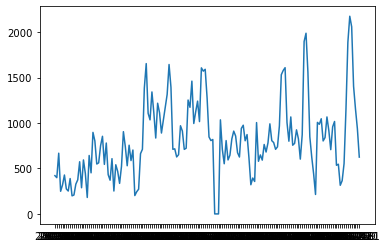

In [61]:
#can plot time series by month
plt.plot(gtrends_monthly.year_month, gtrends_monthly.google_searches)

In [62]:
#Subset bottom 24 months (2 years)
gtrends_monthly_trend = gtrends_monthly.tail(24)

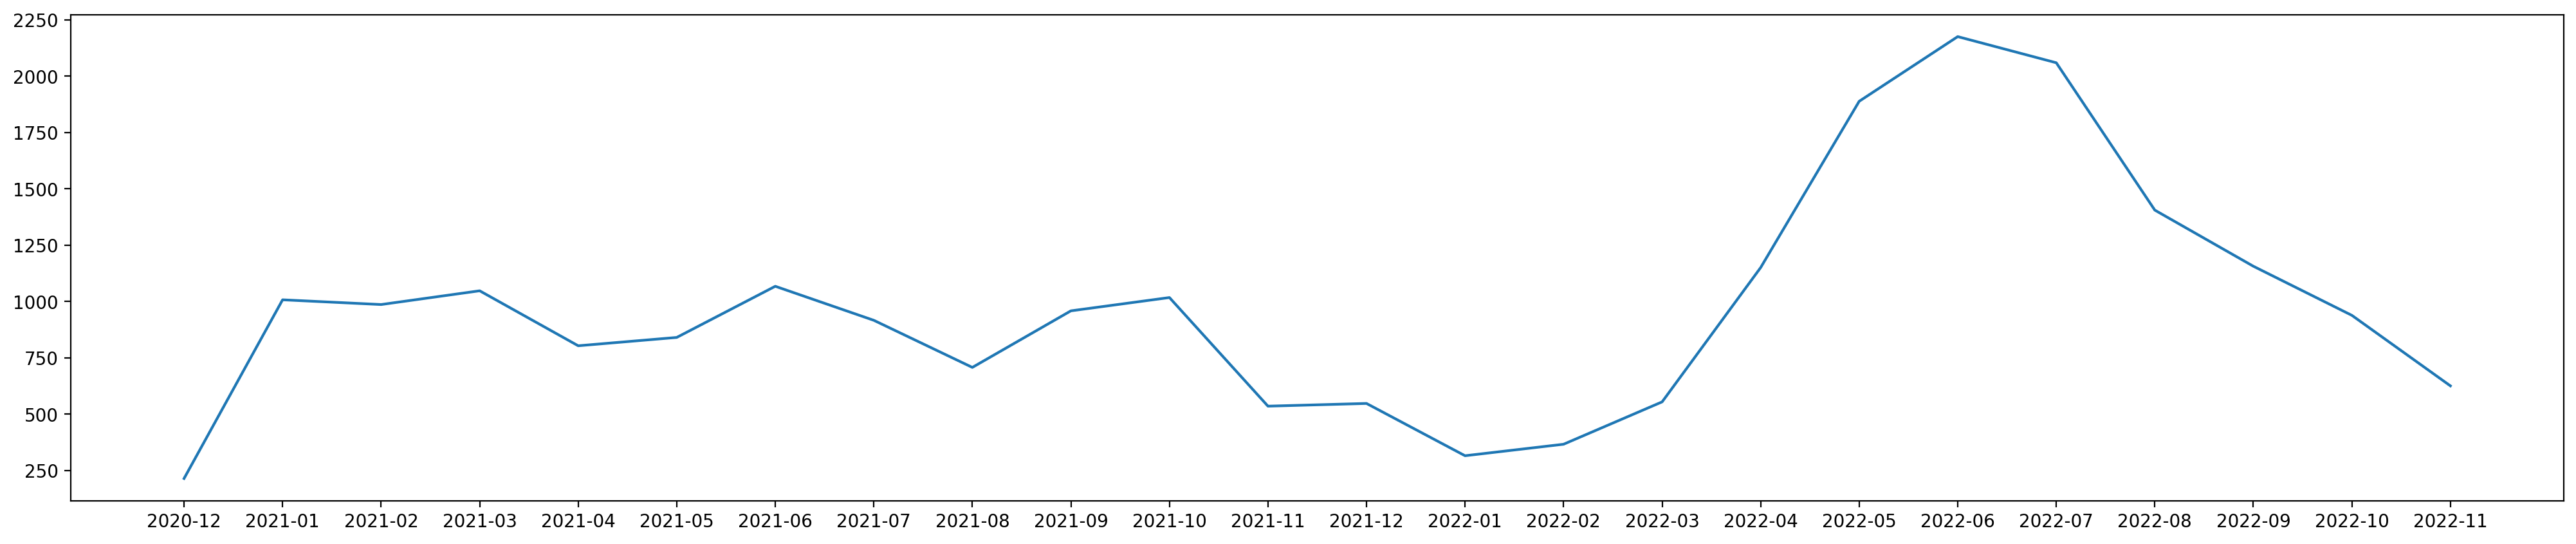

In [63]:
plt.figure(figsize=(25, 5), dpi=200)
plt.plot(gtrends_monthly_trend.year_month, gtrends_monthly_trend.google_searches)

# 1.3 Data Gov

In [64]:
#Read file as weekly cases
weekly = pd.read_csv('../assets/datagov/dengue-cases-count-weekly/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv')

In [65]:
weekly.head()

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0


In [66]:
weekly.shape

(530, 4)

In [67]:
weekly_dengue = weekly.loc[weekly['type_dengue'] == "Dengue"]

In [68]:
weekly_dengue.head(10)

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
2,2014,2,Dengue,479.0
4,2014,3,Dengue,401.0
6,2014,4,Dengue,336.0
8,2014,5,Dengue,234.0
10,2014,6,Dengue,273.0
12,2014,7,Dengue,369.0
14,2014,8,Dengue,193.0
16,2014,9,Dengue,186.0
18,2014,10,Dengue,209.0


In [69]:
#Function to return month based on year and week
def getMonth(year: int, week: int) -> int:
    """Return the month number in the given week in the given year."""
    return datetime.datetime.strptime(f'{year}-W{week}-1', "%Y-W%W-%w").month

In [70]:
#Check if the function is working
print(getMonth(2020, 28))

7


In [71]:
#Function to include a 'month' column
weekly_dengue['month'] = weekly_dengue.apply(lambda x: getMonth(x['year'], x['eweek']), axis = 1)

<ipython-input-71-b068f59b2916>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_dengue['month'] = weekly_dengue.apply(lambda x: getMonth(x['year'], x['eweek']), axis = 1)


In [72]:
weekly_dengue.head()

,year,eweek,type_dengue,number,month
0,2014,1,Dengue,436.0,1
2,2014,2,Dengue,479.0,1
4,2014,3,Dengue,401.0,1
6,2014,4,Dengue,336.0,1
8,2014,5,Dengue,234.0,2


In [73]:
#Add 0 in front of month
weekly_dengue['month'] = weekly_dengue['month'].apply (lambda x: '{0:0>2}'.format (x))

<ipython-input-73-3fdd9cc288ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_dengue['month'] = weekly_dengue['month'].apply (lambda x: '{0:0>2}'.format (x))


In [74]:
weekly_dengue.head()

,year,eweek,type_dengue,number,month
0,2014,1,Dengue,436.0,01
2,2014,2,Dengue,479.0,01
4,2014,3,Dengue,401.0,01
6,2014,4,Dengue,336.0,01
8,2014,5,Dengue,234.0,02


In [75]:
#Create a column 'year_month'
weekly_dengue['year_month'] = weekly_dengue['year'].astype('str')+ "-" + weekly_dengue['month']
weekly_dengue.head()

<ipython-input-75-1cbfeef9080e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_dengue['year_month'] = weekly_dengue['year'].astype('str')+ "-" + weekly_dengue['month']


,year,eweek,type_dengue,number,month,year_month
0,2014,1,Dengue,436.0,01,2014-01
2,2014,2,Dengue,479.0,01,2014-01
4,2014,3,Dengue,401.0,01,2014-01
6,2014,4,Dengue,336.0,01,2014-01
8,2014,5,Dengue,234.0,02,2014-02


In [76]:
weekly_dengue.rename(columns = {'number':'dengue_cases'}, inplace = True)

C:\Users\ANNITAN\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [77]:
weekly_dengue.head()

,year,eweek,type_dengue,dengue_cases,month,year_month
0,2014,1,Dengue,436.0,01,2014-01
2,2014,2,Dengue,479.0,01,2014-01
4,2014,3,Dengue,401.0,01,2014-01
6,2014,4,Dengue,336.0,01,2014-01
8,2014,5,Dengue,234.0,02,2014-02


In [78]:
#Read file as weekly cases
weekly_region = pd.read_csv('../assets/datagov/dengue_cases.csv')

In [79]:
weekly_region.head()

,Unnamed: 0,file,coords,dengue_case_count,area
0,0,dengue-cases-central,"[[103.84655938962, 1.33835592864932, 0.0], [103.846559399316, 1.34016465763331, 0.0], [103.848356518124, 1.34016464720476, 0.0], [103.848356507111, 1.33835591823486, 0.0], [103.84655938962, 1.33835592864932, 0.0]]",4,40269.282884
1,1,dengue-cases-central,"[[103.851950810471, 1.34739953784411, 0.0], [103.851950824211, 1.34920826664606, 0.0], [103.853747949583, 1.34920825213968, 0.0], [103.853747934517, 1.34739952335719, 0.0], [103.851950810471, 1.34739953784411, 0.0]]",2,40269.276655
2,2,dengue-cases-central,"[[103.884299493455, 1.36910380931713, 0.0], [103.884299531676, 1.37091253716851, 0.0], [103.886096672466, 1.37091249799713, 0.0], [103.886096632898, 1.36910377019745, 0.0], [103.884299493455, 1.36910380931713, 0.0]]",3,40269.238463
3,3,dengue-cases-central,"[[103.841168094861, 1.35644324088621, 0.0], [103.841168100683, 1.35825196963194, 0.0], [103.842965232797, 1.3582519630969, 0.0], [103.842965225641, 1.35644323435988, 0.0], [103.841168094861, 1.35644324088621, 0.0]]",1,40269.276397
4,4,dengue-cases-central,"[[103.846559536434, 1.36548686057736, 0.0], [103.846559546327, 1.36729558915537, 0.0], [103.84835668511, 1.36729557851563, 0.0], [103.848356673874, 1.3654868499517, 0.0], [103.846559536434, 1.36548686057736, 0.0]]",1,40269.270830


In [80]:
#drop unnamed column
weekly_region.drop(['Unnamed: 0'], axis=1, inplace=True)

In [81]:
weekly_region.head()

,file,coords,dengue_case_count,area
0,dengue-cases-central,"[[103.84655938962, 1.33835592864932, 0.0], [103.846559399316, 1.34016465763331, 0.0], [103.848356518124, 1.34016464720476, 0.0], [103.848356507111, 1.33835591823486, 0.0], [103.84655938962, 1.33835592864932, 0.0]]",4,40269.282884
1,dengue-cases-central,"[[103.851950810471, 1.34739953784411, 0.0], [103.851950824211, 1.34920826664606, 0.0], [103.853747949583, 1.34920825213968, 0.0], [103.853747934517, 1.34739952335719, 0.0], [103.851950810471, 1.34739953784411, 0.0]]",2,40269.276655
2,dengue-cases-central,"[[103.884299493455, 1.36910380931713, 0.0], [103.884299531676, 1.37091253716851, 0.0], [103.886096672466, 1.37091249799713, 0.0], [103.886096632898, 1.36910377019745, 0.0], [103.884299493455, 1.36910380931713, 0.0]]",3,40269.238463
3,dengue-cases-central,"[[103.841168094861, 1.35644324088621, 0.0], [103.841168100683, 1.35825196963194, 0.0], [103.842965232797, 1.3582519630969, 0.0], [103.842965225641, 1.35644323435988, 0.0], [103.841168094861, 1.35644324088621, 0.0]]",1,40269.276397
4,dengue-cases-central,"[[103.846559536434, 1.36548686057736, 0.0], [103.846559546327, 1.36729558915537, 0.0], [103.84835668511, 1.36729557851563, 0.0], [103.848356673874, 1.3654868499517, 0.0], [103.846559536434, 1.36548686057736, 0.0]]",1,40269.270830


In [82]:
weekly_region['file'].unique()

array(['dengue-cases-central', 'dengue-cases-north-east',
       'dengue-cases-south-east', 'dengue-cases-south-west'], dtype=object)

In [83]:
#Groupby to sum up total number of searches
weekly_region_sum = weekly_region.groupby('file').sum().reset_index()

In [84]:
weekly_region_sum.head()

,file,dengue_case_count,area
0,dengue-cases-central,27,8.053854e+05
1,dengue-cases-north-east,80,1.248345e+06
2,dengue-cases-south-east,10,3.624228e+05
3,dengue-cases-south-west,16,6.443065e+05


# 2. Merging Data

In [85]:
weekly_dengue.shape, gtrends.shape

((265, 6), (4898, 3))

In [86]:
#data includes 2014 to 2018
weekly_dengue.head(), weekly_dengue.tail()

(   year  eweek type_dengue  dengue_cases month year_month
 0  2014      1      Dengue         436.0    01    2014-01
 2  2014      2      Dengue         479.0    01    2014-01
 4  2014      3      Dengue         401.0    01    2014-01
 6  2014      4      Dengue         336.0    01    2014-01
 8  2014      5      Dengue         234.0    02    2014-02,
      year  eweek type_dengue  dengue_cases month year_month
 520  2018     49      Dengue         113.0    12    2018-12
 522  2018     50      Dengue         107.0    12    2018-12
 524  2018     51      Dengue         127.0    12    2018-12
 526  2018     52      Dengue         160.0    12    2018-12
 528  2018     53      Dengue           NaN    12    2018-12)

In [87]:
#data includes 2009 to 2022
gtrends.head(), gtrends.tail()

(         date  google_searches year_month
 0  2009-01-01                0    2009-01
 1  2009-01-02               43    2009-01
 2  2009-01-03                0    2009-01
 3  2009-01-04               55    2009-01
 4  2009-01-05               26    2009-01,
             date  google_searches year_month
 4893  2022-11-23               33    2022-11
 4894  2022-11-24               27    2022-11
 4895  2022-11-25               21    2022-11
 4896  2022-11-26               22    2022-11
 4897  2022-11-27               18    2022-11)

In [88]:
gtrends['year'] = pd.DatetimeIndex(gtrends['date']).year
gtrends.head()

,date,google_searches,year_month,year
0,2009-01-01,0,2009-01,2009
1,2009-01-02,43,2009-01,2009
2,2009-01-03,0,2009-01,2009
3,2009-01-04,55,2009-01,2009
4,2009-01-05,26,2009-01,2009


In [89]:
#Subset data to only have 2014 to 2018
gtrends_sub = gtrends.loc[(gtrends['year'] == 2014) | (gtrends['year'] == 2015) | (gtrends['year'] == 2016) | (gtrends['year'] == 2017) | (gtrends['year'] == 2018)]

In [90]:
gtrends_sub.head()

,date,google_searches,year_month,year
1645,2014-01-01,47,2014-01,2014
1646,2014-01-02,44,2014-01,2014
1647,2014-01-03,28,2014-01,2014
1648,2014-01-04,24,2014-01,2014
1649,2014-01-05,31,2014-01,2014


In [91]:
#Groupby to sum up total number of searches
gtrends_sub = gtrends_sub.groupby('year_month').sum().reset_index()

In [92]:
gtrends_sub.head()

,year_month,google_searches,year
0,2014-01,1218,62434
1,2014-02,1113,56392
2,2014-03,890,62434
3,2014-04,1029,60420
4,2014-05,1168,62434


In [93]:
gtrends_sub = gtrends_sub.drop(columns = ['year'])
gtrends_sub.head()

,year_month,google_searches
0,2014-01,1218
1,2014-02,1113
2,2014-03,890
3,2014-04,1029
4,2014-05,1168


In [94]:
gtrends_sub.tail()

,year_month,google_searches
55,2018-08,592
56,2018-09,764
57,2018-10,681
58,2018-11,782
59,2018-12,991


In [95]:
#Subset data to only have 2014 to 2018
weekly_dengue_sub = weekly_dengue.loc[(weekly_dengue['year'] == 2014) | (weekly_dengue['year'] == 2015) | (weekly_dengue['year'] == 2016) | (weekly_dengue['year'] == 2017) | (weekly_dengue['year'] == 2018)]

In [96]:
weekly_dengue_sub.shape, gtrends_sub.shape

((265, 6), (60, 2))

In [97]:
gtrends_sub.head()

,year_month,google_searches
0,2014-01,1218
1,2014-02,1113
2,2014-03,890
3,2014-04,1029
4,2014-05,1168


In [98]:
weekly_dengue_sub.head()

,year,eweek,type_dengue,dengue_cases,month,year_month
0,2014,1,Dengue,436.0,01,2014-01
2,2014,2,Dengue,479.0,01,2014-01
4,2014,3,Dengue,401.0,01,2014-01
6,2014,4,Dengue,336.0,01,2014-01
8,2014,5,Dengue,234.0,02,2014-02


In [99]:
monthly_dengue_sub = weekly_dengue_sub.groupby('year_month').sum().reset_index()

In [100]:
monthly_dengue_sub.head()

,year_month,year,eweek,dengue_cases
0,2014-01,10070,63,1810.0
1,2014-02,8056,26,1069.0
2,2014-03,10070,55,1054.0
3,2014-04,8056,62,1001.0
4,2014-05,8056,78,1230.0


In [101]:
monthly_dengue_sub.shape, gtrends_sub.shape

((60, 4), (60, 2))

In [102]:
monthly_dengue_sub.head()

,year_month,year,eweek,dengue_cases
0,2014-01,10070,63,1810.0
1,2014-02,8056,26,1069.0
2,2014-03,10070,55,1054.0
3,2014-04,8056,62,1001.0
4,2014-05,8056,78,1230.0


In [103]:
monthly_dengue_sub = monthly_dengue_sub.drop(columns = ['year'])
monthly_dengue_sub.head()

,year_month,eweek,dengue_cases
0,2014-01,63,1810.0
1,2014-02,26,1069.0
2,2014-03,55,1054.0
3,2014-04,62,1001.0
4,2014-05,78,1230.0


In [104]:
gtrends_sub.head()

,year_month,google_searches
0,2014-01,1218
1,2014-02,1113
2,2014-03,890
3,2014-04,1029
4,2014-05,1168


In [105]:
monthly_dengue_sub.dtypes

year_month       object
eweek             int64
dengue_cases    float64
dtype: object

In [106]:
gtrends_sub.dtypes

year_month         period[M]
google_searches        int64
dtype: object

In [107]:
gtrends_sub['year_month'] = gtrends_sub['year_month'].astype('str')

In [108]:
gtrends_sub.dtypes

year_month         object
google_searches     int64
dtype: object

In [109]:
combined = monthly_dengue_sub.merge(gtrends_sub, how='left')

In [110]:
combined.head()

,year_month,eweek,dengue_cases,google_searches
0,2014-01,63,1810.0,1218
1,2014-02,26,1069.0,1113
2,2014-03,55,1054.0,890
3,2014-04,62,1001.0,1029
4,2014-05,78,1230.0,1168


In [111]:
combined.shape

(60, 4)

In [112]:
combined = combined.drop(columns = ['eweek'])
combined.head()

,year_month,dengue_cases,google_searches
0,2014-01,1810.0,1218
1,2014-02,1069.0,1113
2,2014-03,1054.0,890
3,2014-04,1001.0,1029
4,2014-05,1230.0,1168


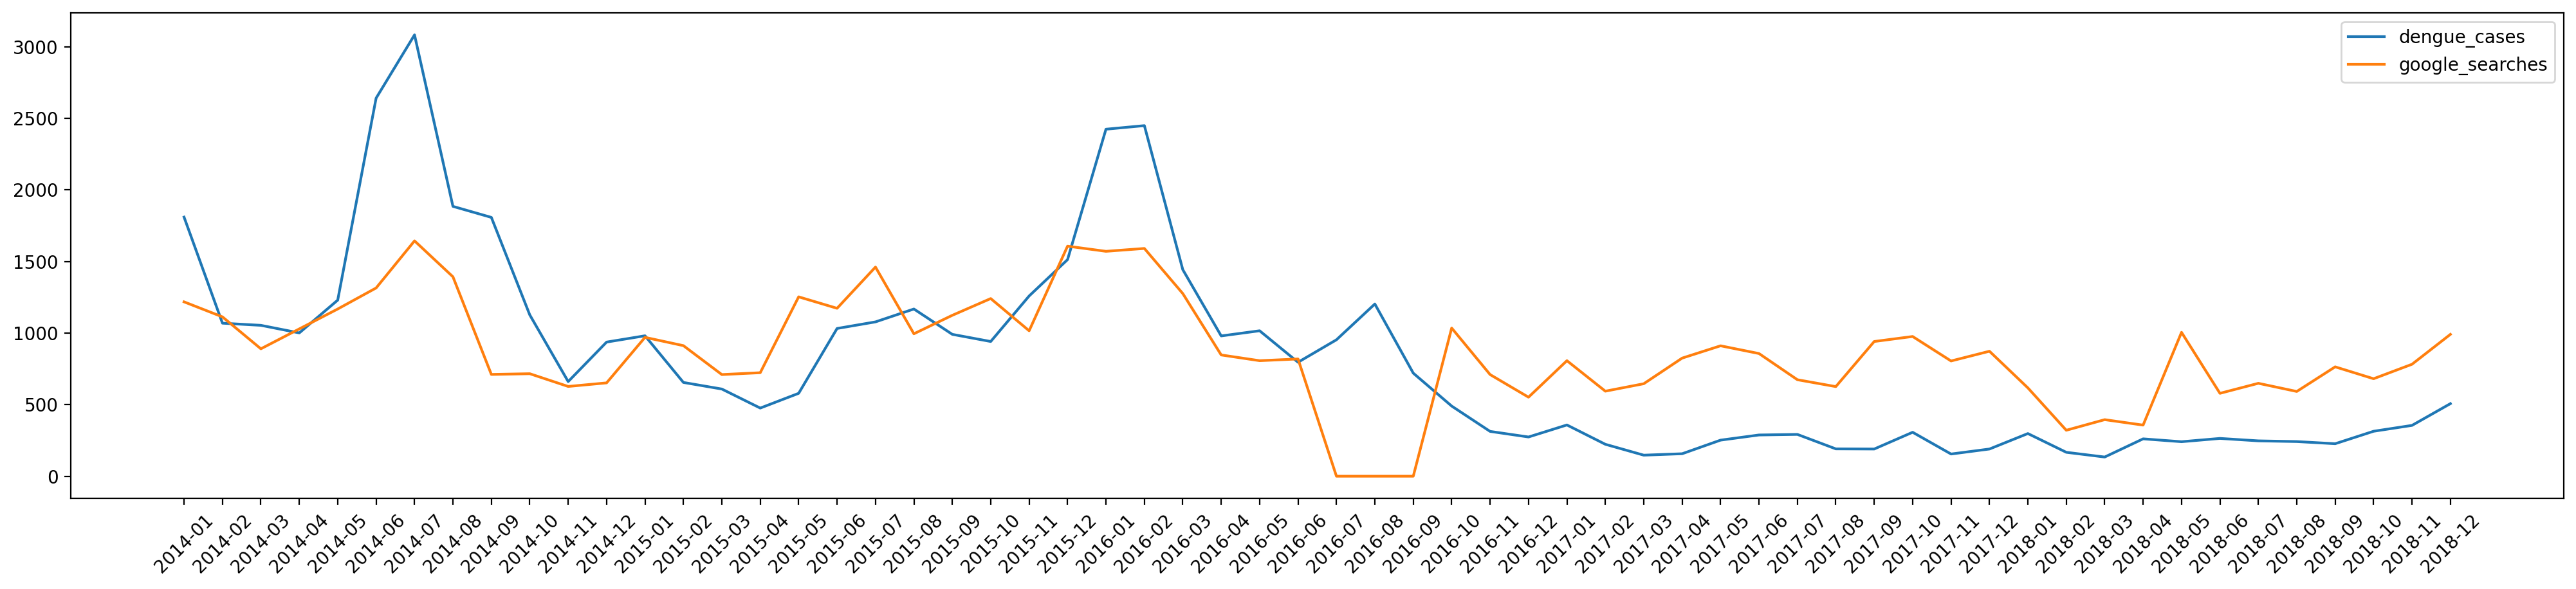

In [113]:
plt.figure(figsize=(25, 5), dpi=200)
plt.plot(combined.year_month, combined.dengue_cases, combined.google_searches)
plt.legend(['dengue_cases', 'google_searches'])
plt.xticks(rotation=45);

In [114]:
#Check head
mss.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_month,date
0,Paya Lebar,2009,01,01,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN,2009-01,2009-01-01
1,Paya Lebar,2009,01,02,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN,2009-01,2009-01-02
2,Paya Lebar,2009,01,03,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN,2009-01,2009-01-03
3,Paya Lebar,2009,01,04,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN,2009-01,2009-01-04
4,Paya Lebar,2009,01,05,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN,2009-01,2009-01-05


In [115]:
mss.shape

(283513, 15)

In [116]:
mss.dtypes

station                             object
year                                object
month                               object
day                                 object
daily_rainfall_total               float64
highest_30_min_rainfall            float64
highest_60_min_rainfall            float64
highest_120_min_rainfall           float64
mean_temperature                   float64
maximum_temperature                float64
minimum_temperature                float64
mean_wind_speed                    float64
max_wind_speed                     float64
year_month                          object
date                        datetime64[ns]
dtype: object

In [117]:
mss_sub = mss.loc[(mss['year'] == '2014') | (mss['year'] == '2015') | (mss['year'] == '2016') | (mss['year'] == '2017') | (mss['year'] == '2018')]

In [118]:
mss_sub.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_month,date
1826,Paya Lebar,2014,01,01,0.0,NaN,NaN,NaN,NaN,29.5,24.8,15.8,35.3,2014-01,2014-01-01
1827,Paya Lebar,2014,01,02,0.0,NaN,NaN,NaN,NaN,31.7,25.0,16.5,37.1,2014-01,2014-01-02
1828,Paya Lebar,2014,01,03,2.2,NaN,NaN,NaN,NaN,31.1,25.1,14.9,33.5,2014-01,2014-01-03
1829,Paya Lebar,2014,01,04,0.6,NaN,NaN,NaN,NaN,32.3,23.7,8.9,35.3,2014-01,2014-01-04
1830,Paya Lebar,2014,01,05,10.5,NaN,NaN,NaN,NaN,27.0,23.8,11.9,33.5,2014-01,2014-01-05


In [119]:
mss_sub2 = mss_sub.groupby('year_month').agg(daily_rainfall_total=('daily_rainfall_total', 'sum'), mean_temperature=('mean_temperature', 'mean'), minimum_temperature=('minimum_temperature', 'min'), maximum_temperature=('maximum_temperature', 'max')).reset_index()
#Round temperature to 1dp
mss2['mean_temperature'] = mss2['mean_temperature'].round(decimals = 1)

In [120]:
mss_sub2.head()

,year_month,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature
0,2014-01,4315.9,26.276491,20.1,34.0
1,2014-02,1012.1,27.267424,20.1,35.3
2,2014-03,7212.0,27.787956,21.7,36.3
3,2014-04,12688.9,28.170161,22.3,35.8
4,2014-05,14699.7,28.502308,21.6,35.4


In [121]:
combined2 = combined.merge(mss_sub2, how='left')

In [122]:
combined2.head()

,year_month,dengue_cases,google_searches,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature
0,2014-01,1810.0,1218,4315.9,26.276491,20.1,34.0
1,2014-02,1069.0,1113,1012.1,27.267424,20.1,35.3
2,2014-03,1054.0,890,7212.0,27.787956,21.7,36.3
3,2014-04,1001.0,1029,12688.9,28.170161,22.3,35.8
4,2014-05,1230.0,1168,14699.7,28.502308,21.6,35.4


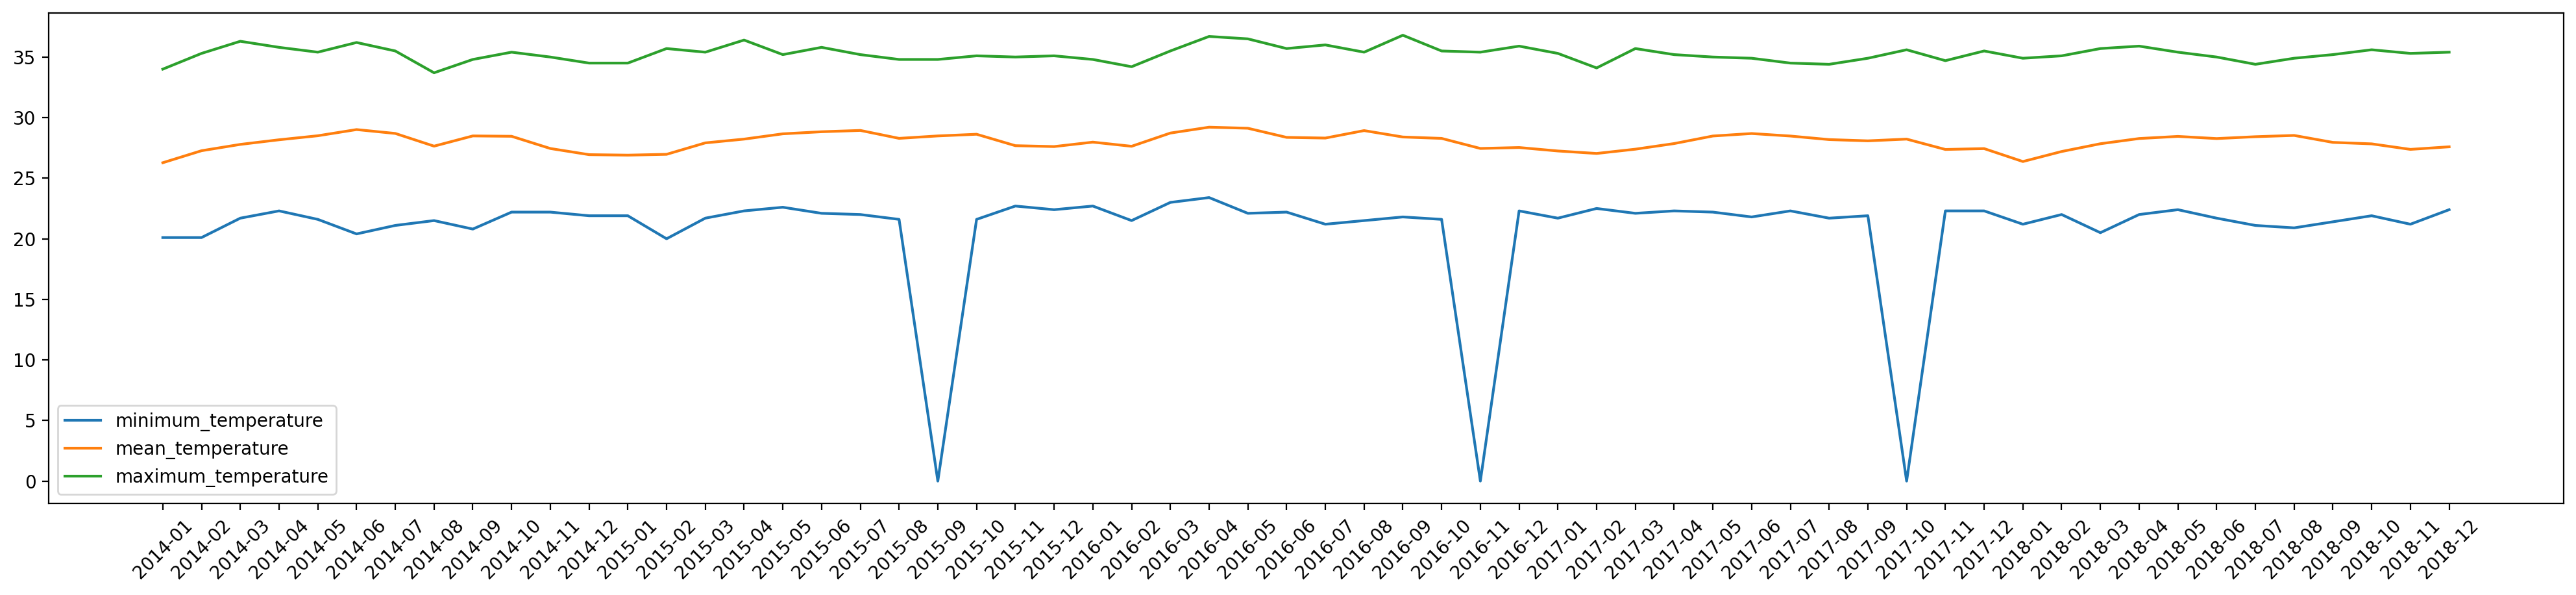

In [123]:
plt.figure(figsize=(25, 5), dpi=200)
plt.plot(combined2.year_month, combined2.minimum_temperature, combined2.mean_temperature)
plt.plot(combined2.year_month, combined2.maximum_temperature)
plt.legend(['minimum_temperature', 'mean_temperature', 'maximum_temperature'])

plt.xticks(rotation=45);

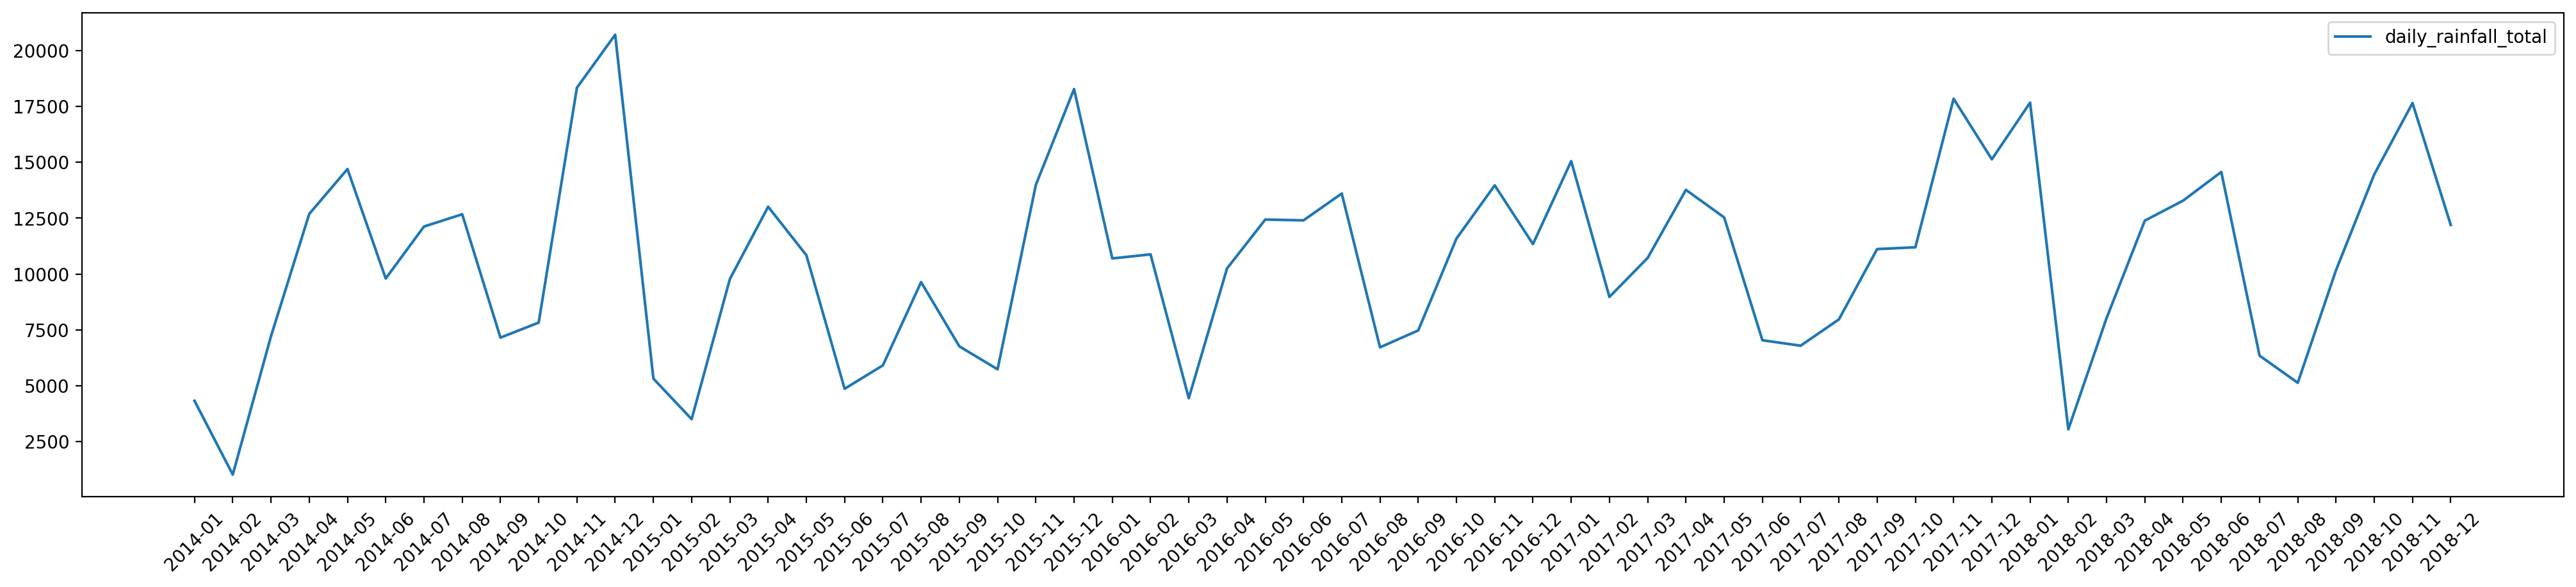

In [124]:
plt.figure(figsize=(25, 5), dpi=200)
plt.plot(combined2.year_month, combined2.daily_rainfall_total)
plt.legend(['daily_rainfall_total'])

plt.xticks(rotation=45);

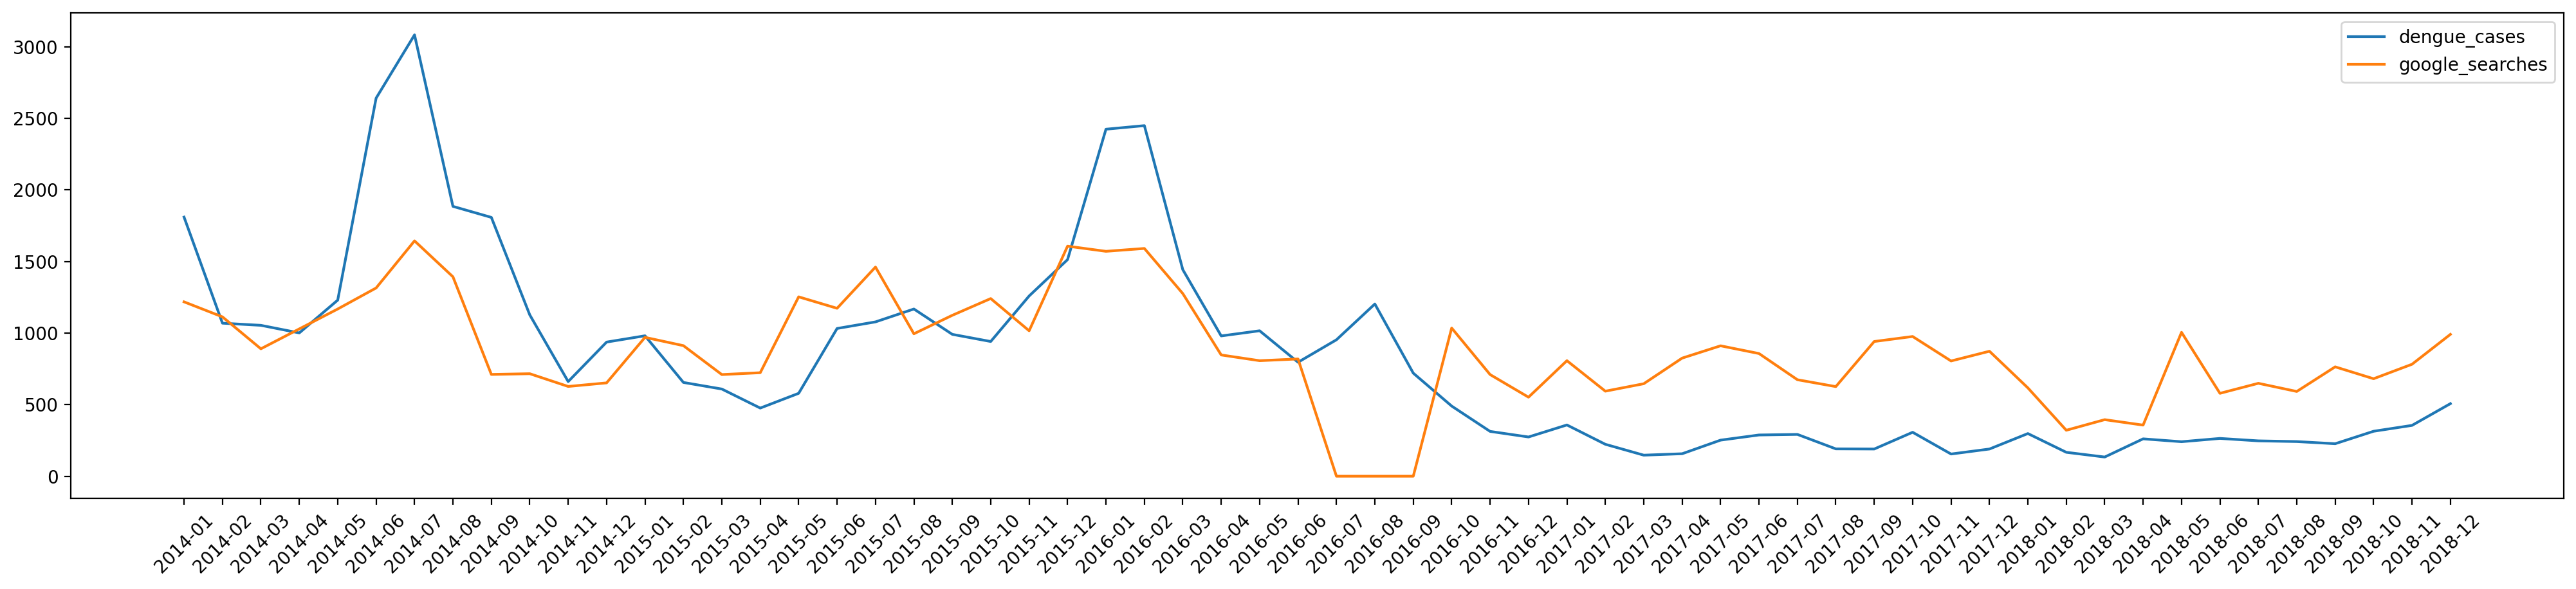

In [125]:
plt.figure(figsize=(25, 5), dpi=200)
plt.plot(combined.year_month, combined.dengue_cases, combined.google_searches)
plt.legend(['dengue_cases', 'google_searches'])
plt.xticks(rotation=45);


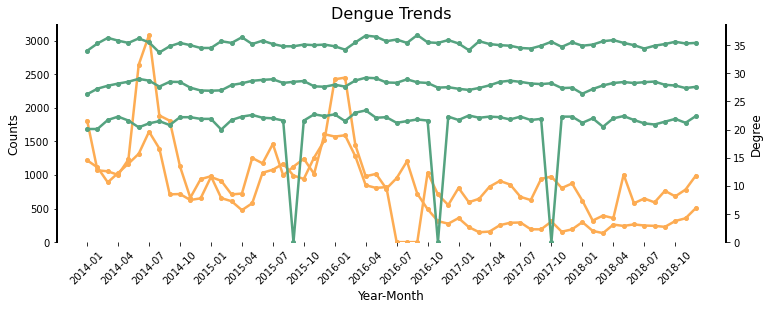

In [126]:
# figure
fig, ax = plt.subplots(1, figsize=(12,4), facecolor='white')
ax.set_facecolor('white')

# data
dt = combined2.year_month
dengue = combined['dengue_cases']
gtrends = combined['google_searches']
daily_rainfall_total = combined2['daily_rainfall_total']

maximum_temp = combined2['maximum_temperature']
minimum_temp = combined2['minimum_temperature']
mean_temperature = combined2['mean_temperature']

# plot
plt.plot(dt, dengue, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
plt.plot(dt, gtrends, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
#plt.plot(dt, daily_rainfall_total, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)

ax2 = ax.twinx()
ax2.plot(dt, maximum_temp, marker='o', markersize=4, color='#55A380', linewidth=2.5)
ax2.plot(dt, minimum_temp, marker='o', markersize=4, color='#55A380', linewidth=2.5)
ax2.plot(dt, mean_temperature, marker='o', markersize=4, color='#55A380', linewidth=2.5)

# ticks
ax.tick_params(axis='both', colors='black')
ax2.tick_params(axis='both', colors='black')
plt.xticks(rotation=45)
plt.xticks(dt[::3])

ax.set_xticklabels(dt[::3],rotation=45)

# spines
for i in ['top', 'bottom']:
    ax.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
 

ax2.spines['left'].set_color('black')
ax2.spines['left'].set_linewidth(2)

ax2.spines['right'].set_color('black')
ax2.spines['right'].set_linewidth(2)

# grid
ax.set_axisbelow(True)
ax.xaxis.grid(color='w', linestyle='dashed', alpha=0.5)

# labels n title
ax.set_xlabel('Year-Month', color='black', fontsize=12)
ax.set_ylabel('Counts', color='black', fontsize=12)
ax2.set_ylabel('Degree', color='black', fontsize=12)
plt.title('Dengue Trends', loc='center', color='black', fontsize=16)


# limits
ax.set_ylim(0,)
ax2.set_ylim(0,)

plt.show()

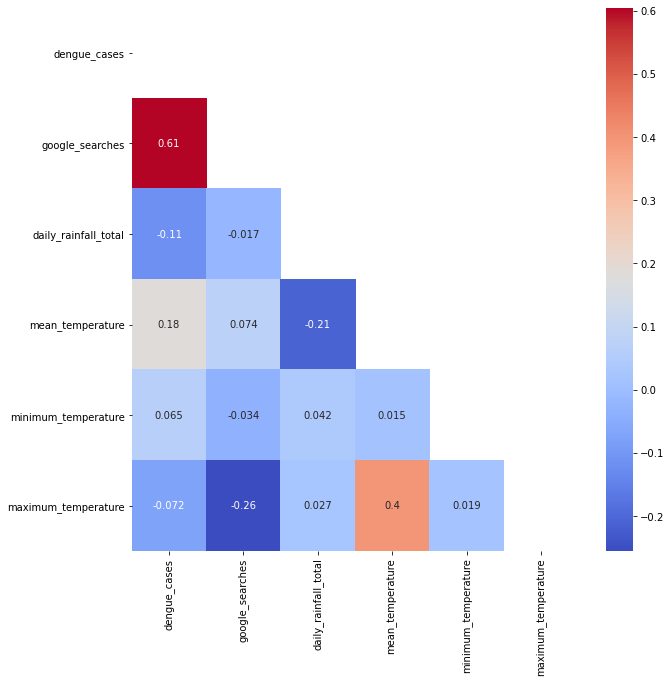

In [127]:
#Correlation
mask = np.zeros_like(combined2.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(
    combined2.corr(),
    cmap='coolwarm',
    annot=True,
    mask = mask
);


In [135]:
weekly_dengue_sub.head()

,year,eweek,type_dengue,dengue_cases,month,year_month
0,2014,1,Dengue,436.0,01,2014-01
2,2014,2,Dengue,479.0,01,2014-01
4,2014,3,Dengue,401.0,01,2014-01
6,2014,4,Dengue,336.0,01,2014-01
8,2014,5,Dengue,234.0,02,2014-02


In [136]:
mss.head()

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_month,date,week,year-week
0,Paya Lebar,2009,01,01,0.0,NaN,NaN,NaN,NaN,32.7,24.0,8.4,NaN,2009-01,2009-01-01,00,2009-00
1,Paya Lebar,2009,01,02,0.5,NaN,NaN,NaN,NaN,30.5,24.0,12.3,NaN,2009-01,2009-01-02,00,2009-00
2,Paya Lebar,2009,01,03,0.0,NaN,NaN,NaN,NaN,30.1,25.0,13.5,NaN,2009-01,2009-01-03,00,2009-00
3,Paya Lebar,2009,01,04,1.6,NaN,NaN,NaN,NaN,30.2,24.6,13.0,NaN,2009-01,2009-01-04,01,2009-01
4,Paya Lebar,2009,01,05,2.5,NaN,NaN,NaN,NaN,32.3,25.2,15.4,NaN,2009-01,2009-01-05,01,2009-01


In [142]:
mss_1 = mss.loc[(mss['year'] == '2014') | (mss['year'] == '2015') | (mss['year'] == '2016') | (mss['year'] == '2017') | (mss['year'] == '2018')]

In [143]:
mss_1

,station,year,month,day,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_month,date,week,year-week
1826,Paya Lebar,2014,01,01,0.0,NaN,NaN,NaN,NaN,29.5,24.8,15.8,35.3,2014-01,2014-01-01,00,2014-00
1827,Paya Lebar,2014,01,02,0.0,NaN,NaN,NaN,NaN,31.7,25.0,16.5,37.1,2014-01,2014-01-02,00,2014-00
1828,Paya Lebar,2014,01,03,2.2,NaN,NaN,NaN,NaN,31.1,25.1,14.9,33.5,2014-01,2014-01-03,00,2014-00
1829,Paya Lebar,2014,01,04,0.6,NaN,NaN,NaN,NaN,32.3,23.7,8.9,35.3,2014-01,2014-01-04,00,2014-00
1830,Paya Lebar,2014,01,05,10.5,NaN,NaN,NaN,NaN,27.0,23.8,11.9,33.5,2014-01,2014-01-05,01,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282502,Pasir Ris (Central),2018,12,27,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2018-12,2018-12-27,51,2018-51
282503,Pasir Ris (Central),2018,12,28,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2018-12,2018-12-28,51,2018-51
282504,Pasir Ris (Central),2018,12,29,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2018-12,2018-12-29,51,2018-51
282505,Pasir Ris (Central),2018,12,30,6.8,4.0,6.0,6.8,NaN,NaN,NaN,NaN,NaN,2018-12,2018-12-30,52,2018-52


In [144]:
mss_2 = mss_1.groupby('year-week').agg(daily_rainfall_total=('daily_rainfall_total', 'sum'), mean_temperature=('mean_temperature', 'mean'), minimum_temperature=('minimum_temperature', 'min'), maximum_temperature=('maximum_temperature', 'max')).reset_index()

In [145]:
mss_2

,year-week,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature
0,2014-00,765.1,26.932000,22.7,32.4
1,2014-01,3393.1,26.341353,22.4,34.0
2,2014-02,157.7,26.321053,21.1,31.1
3,2014-03,0.0,25.869173,21.0,31.0
4,2014-04,0.0,26.200000,20.1,34.3
...,...,...,...,...,...
260,2018-48,3718.4,27.167257,22.8,35.2
261,2018-49,4037.8,27.010345,22.8,34.9
262,2018-50,1834.4,27.799138,22.6,34.9
263,2018-51,359.7,28.382759,22.4,34.7


In [148]:
weekly_dengue_sub['eweek'] = weekly_dengue_sub['eweek'].apply (lambda x: '{0:0>2}'.format (x))

In [158]:
weekly_dengue_sub.dtypes

year              int64
eweek            object
type_dengue      object
dengue_cases    float64
month            object
year_month       object
year-week        object
dtype: object

In [159]:
weekly_dengue_sub['year'] = weekly_dengue_sub['year'].astype(str)

In [160]:
weekly_dengue_sub.dtypes

year             object
eweek            object
type_dengue      object
dengue_cases    float64
month            object
year_month       object
year-week        object
dtype: object

In [161]:
#New
#Create a column Date
weekly_dengue_sub['year-week'] = weekly_dengue_sub['year']+ "-" + weekly_dengue_sub['eweek']

In [162]:
weekly_dengue_sub.head()

,year,eweek,type_dengue,dengue_cases,month,year_month,year-week
0,2014,01,Dengue,436.0,01,2014-01,2014-01
2,2014,02,Dengue,479.0,01,2014-01,2014-02
4,2014,03,Dengue,401.0,01,2014-01,2014-03
6,2014,04,Dengue,336.0,01,2014-01,2014-04
8,2014,05,Dengue,234.0,02,2014-02,2014-05


In [163]:
weekly_dengue_sub

,year,eweek,type_dengue,dengue_cases,month,year_month,year-week
0,2014,01,Dengue,436.0,01,2014-01,2014-01
2,2014,02,Dengue,479.0,01,2014-01,2014-02
4,2014,03,Dengue,401.0,01,2014-01,2014-03
6,2014,04,Dengue,336.0,01,2014-01,2014-04
8,2014,05,Dengue,234.0,02,2014-02,2014-05
...,...,...,...,...,...,...,...
520,2018,49,Dengue,113.0,12,2018-12,2018-49
522,2018,50,Dengue,107.0,12,2018-12,2018-50
524,2018,51,Dengue,127.0,12,2018-12,2018-51
526,2018,52,Dengue,160.0,12,2018-12,2018-52


In [165]:
#Drop first 12 rows
weekly_dengue_sub_13weeks = weekly_dengue_sub.iloc[12: , :]

In [167]:
weekly_dengue_sub_13weeks.head()

,year,eweek,type_dengue,dengue_cases,month,year_month,year-week
24,2014,13,Dengue,225.0,03,2014-03,2014-13
26,2014,14,Dengue,240.0,04,2014-04,2014-14
28,2014,15,Dengue,244.0,04,2014-04,2014-15
30,2014,16,Dengue,235.0,04,2014-04,2014-16
32,2014,17,Dengue,282.0,04,2014-04,2014-17


In [168]:
mss_2.head()

,year-week,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature
0,2014-00,765.1,26.932000,22.7,32.4
1,2014-01,3393.1,26.341353,22.4,34.0
2,2014-02,157.7,26.321053,21.1,31.1
3,2014-03,0.0,25.869173,21.0,31.0
4,2014-04,0.0,26.200000,20.1,34.3


In [169]:
mss_2['row_num'] = np.arange(len(mss_2))

In [170]:
mss_2.head()

,year-week,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature,row_num
0,2014-00,765.1,26.932000,22.7,32.4,0
1,2014-01,3393.1,26.341353,22.4,34.0,1
2,2014-02,157.7,26.321053,21.1,31.1,2
3,2014-03,0.0,25.869173,21.0,31.0,3
4,2014-04,0.0,26.200000,20.1,34.3,4


In [171]:
weekly_dengue_sub_13weeks['row_num'] = np.arange(len(weekly_dengue_sub_13weeks))

<ipython-input-171-40c5f0ee0c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_dengue_sub_13weeks['row_num'] = np.arange(len(weekly_dengue_sub_13weeks))


In [172]:
weekly_dengue_sub_13weeks.head()

,year,eweek,type_dengue,dengue_cases,month,year_month,year-week,row_num
24,2014,13,Dengue,225.0,03,2014-03,2014-13,0
26,2014,14,Dengue,240.0,04,2014-04,2014-14,1
28,2014,15,Dengue,244.0,04,2014-04,2014-15,2
30,2014,16,Dengue,235.0,04,2014-04,2014-16,3
32,2014,17,Dengue,282.0,04,2014-04,2014-17,4


In [175]:
merged = mss_2.merge(weekly_dengue_sub_13weeks, how='left', on=["row_num", "row_num"])

In [176]:
merged.head()

,year-week_x,daily_rainfall_total,mean_temperature,minimum_temperature,maximum_temperature,row_num,year,eweek,type_dengue,dengue_cases,month,year_month,year-week_y
0,2014-00,765.1,26.932000,22.7,32.4,0,2014,13,Dengue,225.0,03,2014-03,2014-13
1,2014-01,3393.1,26.341353,22.4,34.0,1,2014,14,Dengue,240.0,04,2014-04,2014-14
2,2014-02,157.7,26.321053,21.1,31.1,2,2014,15,Dengue,244.0,04,2014-04,2014-15
3,2014-03,0.0,25.869173,21.0,31.0,3,2014,16,Dengue,235.0,04,2014-04,2014-16
4,2014-04,0.0,26.200000,20.1,34.3,4,2014,17,Dengue,282.0,04,2014-04,2014-17


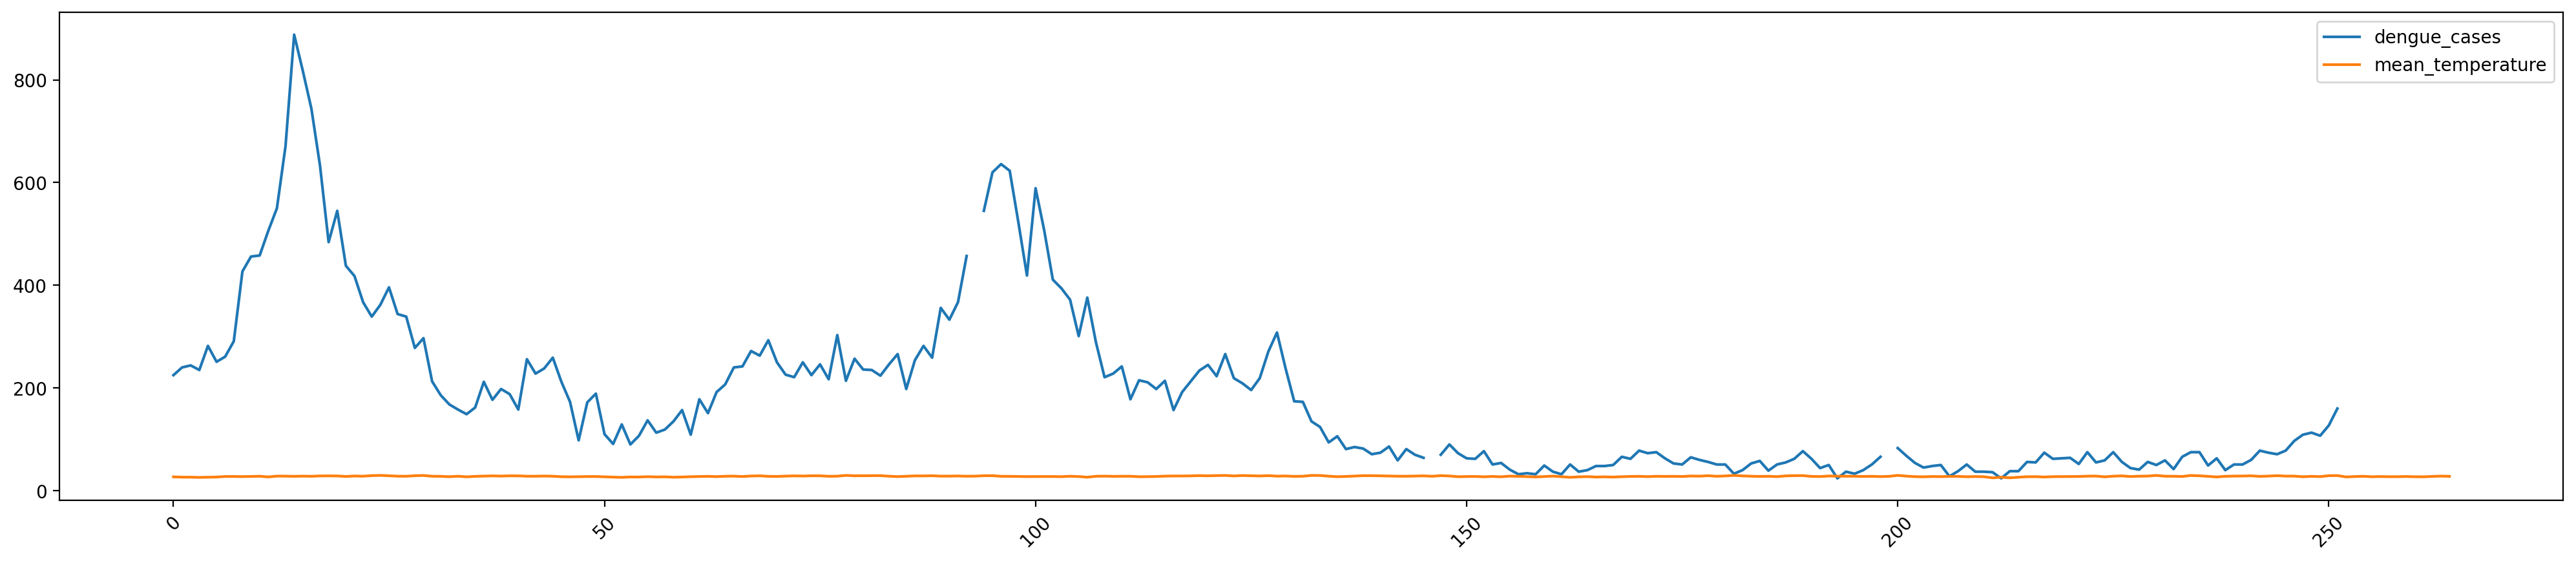

In [177]:
plt.figure(figsize=(25, 5), dpi=200)
plt.plot(merged.row_num, merged.dengue_cases, merged.mean_temperature)
plt.legend(['dengue_cases', 'mean_temperature'])
plt.xticks(rotation=45);

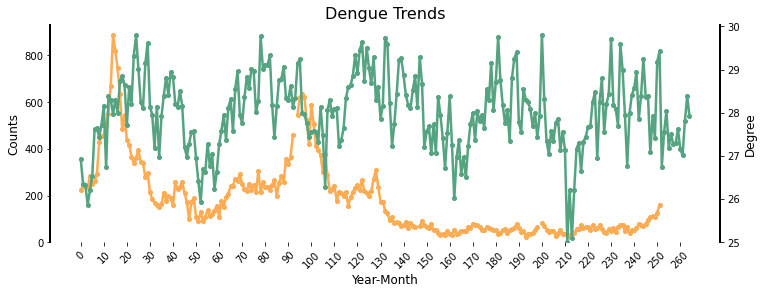

In [187]:
# figure
fig, ax = plt.subplots(1, figsize=(12,4), facecolor='white')
ax.set_facecolor('white')

# data
dt = merged.row_num
dengue = merged['dengue_cases']
mean_temp = merged['mean_temperature']


# plot
plt.plot(dt, dengue, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
#plt.plot(dt, mean_temp, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)
#plt.plot(dt, daily_rainfall_total, marker='o', markersize=4, color='#FDAC53', linewidth=2.5)

ax2 = ax.twinx()
ax2.plot(dt, mean_temp, marker='o', markersize=4, color='#55A380', linewidth=2.5)
#ax2.plot(dt, minimum_temp, marker='o', markersize=4, color='#55A380', linewidth=2.5)
#ax2.plot(dt, mean_temperature, marker='o', markersize=4, color='#55A380', linewidth=2.5)

# ticks
ax.tick_params(axis='both', colors='black')
ax2.tick_params(axis='both', colors='black')
plt.xticks(rotation=45)
plt.xticks(dt[::10])

ax.set_xticklabels(dt[::10],rotation=45)

# spines
for i in ['top', 'bottom']:
    ax.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
 

ax2.spines['left'].set_color('black')
ax2.spines['left'].set_linewidth(2)

ax2.spines['right'].set_color('black')
ax2.spines['right'].set_linewidth(2)

# grid
ax.set_axisbelow(True)
ax.xaxis.grid(color='w', linestyle='dashed', alpha=0.5)

# labels n title
ax.set_xlabel('Year-Month', color='black', fontsize=12)
ax.set_ylabel('Counts', color='black', fontsize=12)
ax2.set_ylabel('Degree', color='black', fontsize=12)
plt.title('Dengue Trends', loc='center', color='black', fontsize=16)


# limits
ax.set_ylim(0,)
ax2.set_ylim(25,)

plt.show()